We begin by implementing Newton's method. The test function we are using is the Rosenbrock function in three variables, which is implemented along with functions to evaluate the gradient and hessian of the function.

In [89]:
# Importing Dependencies
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import math

In [90]:
def test_func(x):
    return x[0]**2 + x[1]**2 + x[2]**2

def grad_test_func(x):
    return np.array([2*x[0], 2*x[1], 2*x[2]])

def hess_test_func(x):
    return np.array([[2, 0, 0],
                     [0, 2, 0],
                     [0, 0, 2]])

'''
Rosenbrock function takes an input vector x and returns
the evalutation
'''
def rosenbrock(x):
    N = len(x)
    sum = 0
    
    for i in range(N-1):
        sum += 100 * (x[i+1] - x[i]**2)**2 + (1 - x[i])**2
        
    return sum

'''
Returns the gradient of the Rosenbrock function in 3 variables at x
'''
def grad_rosenbrock_3D(x):
    grad = np.zeros(3)
    grad[0] = -400 * x[0] * (-x[0]**2 + x[1]) + 2 * (x[0] - 1) 
    grad[1] = -400 * x[1] * (-x[1]**2 + x[2]) + 200 * (x[1] - x[0]**2) + 2 * (x[1] - 1)
    grad[2] = 200 * (-x[1]**2 + x[2])
    return grad


'''
Returns the hessian of the Rosenbrock function in 3 variables at x
'''
def hess_rosenbrock_3D(x):
    hess = np.zeros((3,3))
    hess[0, 0] = 1200*x[0]**2 - 400*x[1] + 2
    hess[0, 1] = -400*x[0]
    hess[1, 0] = -400*x[0]
    hess[1, 1] = 1200*x[1]**2 - 400*x[2] + 202
    hess[1, 2] = -400*x[1]
    hess[2, 1] = -400*x[1]
    hess[2, 2] = 200
    return hess


x = [1, 1, 1]
print(rosenbrock(x))
print(grad_rosenbrock_3D(x))
print(hess_rosenbrock_3D(x))

0
[0. 0. 0.]
[[ 802. -400.    0.]
 [-400. 1002. -400.]
 [   0. -400.  200.]]


As a starting point, we'll use gradient descent:

In [91]:
def wolfe_conditions(x, f, grad, p, alpha=1.0, c1=0.25, c2=0.75, max_iters=100):
    # initialize variables
    t = 1.0
    fx = f(x)
    gxp = grad(x).dot(p)
    
    # loop until condition is satisfied or max iterations reached
    for i in range(max_iters):
        if f(x + t * p) > fx + c1 * t * gxp:
            t /= 2.0
        elif grad(x + t * p).dot(p) < c2 * gxp:
            t *= 2.0
        else:
            break
            
    return t

In [92]:
'''
Gradient Descent
    Inputs:
    x0 - Initial guess vector
    f - Function to be minimized
    grad - Evaluates the gradient of function f at x
    tol - Arbitrary tolerance for convergence
    Nmax - Maximum number of iterations

    Returns:
    tuple containing sequence of iterates, errors, and 
'''
def gradient_descent(x0, f, grad, tol=1e-6, Nmax=1000):
    
    x = x0.copy()
    x_seq = np.zeros((Nmax+1, len(x0)))
    x_seq[0] = x
    n = 0
    
    while n < Nmax:
        
        g = grad(x)

        p = - g/np.linalg.norm(g)
        
        t = wolfe_conditions(x, f, grad, p)
        
        x1 = x + t * p
        
        
        x_seq[n+1] = x1
        
        if np.linalg.norm(x) < tol:
            return x, x_seq, n
        elif np.linalg.norm(x) > 1e10:
            return math.nan, None, None
        
        x = x1

        n += 1
        
    print("Max iterations reached")
    return x, x_seq, n

Now, we can implement gradient descent and Newton's method:

In [93]:
'''
Newton Descent
    Inputs:
    x0 - Initial guess vector
    f - Function to be minimized
    grad - Evaluates the gradient of function f at x
    hess - Evaluates the hessian of f at x
    tol - Arbitrary tolerance for convergence
    Nmax - Maximum number of iterations

    Returns:
    tuple containing sequence of iterates, errors, and 
'''
def newton_descent(x0, f, grad, hess, tol=1e-6, Nmax=100):

    x = x0.copy()
    x_seq = np.zeros((Nmax+1, len(x0)))
    x_seq[0] = x
    g_seq = np.zeros((Nmax+1, len(x0)))
    n = 0

    while n < Nmax:
        
        g = grad(x)
        g_seq[n] = np.linalg.norm(g)
        
        H = hess(x)
        p = -np.linalg.solve(H, g)
        
        t = wolfe_conditions(x, f, grad, p)
        
        x1 = x + t*p
        
        if np.linalg.norm(p) < tol:
            return x1, x_seq, g_seq, n
        
        n += 1
        
        x_seq[n] = x1
        
        x = x1
        
    print("Max iterations reached")
    return x, x_seq, g_seq, n

In [94]:
# Let's try our test function:
x0 = np.array([-1.2, 1, .5])

# Using gradient descent:
#x, x_seq, g_seq, its = gradient_descent(x0, test_func, grad_test_func)

#print(x,"\n", x_seq[:its+1])

# Using Newton Descent:
x, x_seq, g_seq, its = newton_descent(x0, test_func, grad_test_func, hess_test_func)

#print(x,"\n", x_seq[:its+1])

In [95]:
# Using gradient descent:
#gdx, gdx_seq, its = gradient_descent(x0, rosenbrock, grad_rosenbrock_3D)

#print(gdx, gdx_seq[:its])

x, x_seq, g_seq, its = newton_descent(x0, rosenbrock, grad_rosenbrock_3D, hess_rosenbrock_3D, tol=1e-12)

#Expected root is at (1, 1, 1)
print(x,"\n", x_seq[:its+1])
print(g_seq[0:its])

[1. 1. 1.] 
 [[-1.20000000e+00  1.00000000e+00  5.00000000e-01]
 [-1.05396963e+00  1.04454085e+00  1.08908171e+00]
 [-9.39212403e-01  8.70930262e-01  7.28378884e-01]
 [-8.69131332e-01  7.59593502e-01  5.64586415e-01]
 [-7.99316974e-01  6.41448209e-01  3.91299557e-01]
 [-7.02400926e-01  4.94931481e-01  2.23490019e-01]
 [-6.06485894e-01  3.70274749e-01  1.21564089e-01]
 [-4.70144728e-01  2.15118025e-01  2.22021558e-02]
 [-3.56079733e-01  1.26768076e-01  8.26443171e-03]
 [-1.91036282e-01  1.64351149e-02 -1.58061061e-02]
 [-3.72730384e-02 -1.12511628e-02 -6.39941308e-04]
 [ 9.90747778e-02 -1.00527026e-02 -2.83644464e-04]
 [ 3.17344470e-01  6.23862569e-02 -1.35535780e-03]
 [ 4.45806089e-01  1.89021455e-01  1.96926371e-02]
 [ 6.42928137e-01  3.74793304e-01  1.05958841e-01]
 [ 6.78418879e-01  4.58620432e-01  2.03305713e-01]
 [ 7.69884783e-01  5.83249763e-01  3.21134322e-01]
 [ 8.26184571e-01  6.78975163e-01  4.51843920e-01]
 [ 8.99028840e-01  8.02653418e-01  6.28956199e-01]
 [ 9.26364310e-01 

We see that the gradient descent function diverges away from the root. Now, let's show the order of convergence empirically:

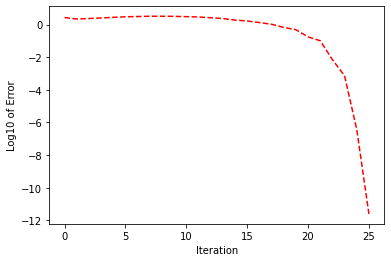

In [96]:
err = np.sum(np.abs(x_seq-x),axis=1);
plt.plot(np.arange(its),np.log10(err[0:its]), 'r--');
plt.xlabel('Iteration')
plt.ylabel('Log10 of Error')
plt.show();

#### Lazy Newton:
So, Newton worked pretty well. Now let's see how Lazy Newton compares:

In [97]:
'''
Lazy Newton
    Instead of computing the Hessian on each iterate, we only
    compute it once and use that at each step.

    Inputs:
    x0 - Initial guess vector
    f - Function to be minimized
    grad - Evaluates the gradient of function f at x
    hess - Evaluates the hessian of f at x
    tol - Arbitrary tolerance for convergence
    Nmax - Maximum number of iterations

    Returns:
    tuple containing sequence of iterates, errors, and 
'''
def lazy_newton(x0, f, grad, hess, tol=1e-6, Nmax=100):
    
    x = x0.copy()
    x_seq = np.zeros((Nmax+1, len(x0)))
    x_seq[0] = x
    n = 0
    
    H = hess(x) # Computing the initial Hessian
    
    while n < Nmax:
        
        g = grad(x)
        
        # For Slacker Newton, update Hessian every few iterations
#         if n % 4 == 0:
#             H = hess(x)
        
        p = -np.linalg.solve(H, g)
        
        t = wolfe_conditions(x, f, grad, p)
        
        x1 = x + t * p
        
        x_seq[n+1] = x1 
        
        if np.linalg.norm(p) < tol:
            return x, x_seq, n
        
        n += 1
        
        x = x1
        
    print("Max iterations reached")
    return x, x_seq, n

Max iterations reached
[1. 1. 1.]


Text(0, 0.5, 'Log10 of Error')

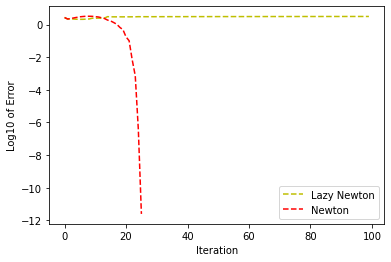

In [98]:
lx, lx_seq, lits = lazy_newton(x0, rosenbrock, grad_rosenbrock_3D, hess_rosenbrock_3D)

print(x)

lerr = np.sum(np.abs(lx_seq-x),axis=1);
plt.plot(np.arange(100), np.log10(lerr[0:100]), 'y--', np.log10(err[0:its]), 'r--')
plt.legend(['Lazy Newton', 'Newton'])
plt.xlabel('Iteration')
plt.ylabel('Log10 of Error')
#plt.show();

In [99]:
def slacker_newton(x0, f, grad, hess, tol=1e-12, Nmax=100):
    
    x = x0.copy()
    x_seq = np.zeros((Nmax+1, len(x0)))
    x_seq[0] = x
    n = 1
    
    H = hess(x) # Computing the initial Hessian
    h_count = 0
    
    while n < Nmax:
        
        g = grad(x)
        
        # For Slacker Newton, update Hessian based on norm condition:
        
        if n % 5 == 0:
            H = hess(x)
            h_count += 1
        
        p = -np.linalg.solve(H, g)
        
        t = wolfe_conditions(x, f, grad, p)
        
        x1 = x + t * p
        
        x_seq[n] = x1 
        
        if np.linalg.norm(g) < tol:
            return x, x_seq, n, h_count
        
        n += 1
        
        x = x1
        
    print("Max iterations reached")
    return x, x_seq, n, h_count

15


Text(0, 0.5, 'Log10 of Error')

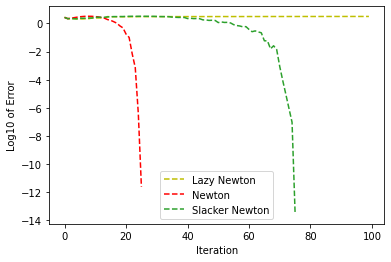

In [100]:
slx, slx_seq, sl_its, h_count = slacker_newton(x0, rosenbrock, grad_rosenbrock_3D, hess_rosenbrock_3D, tol=1e-12)

print(h_count)

slerr = np.sum(np.abs(slx_seq-x),axis=1);
plt.plot(np.arange(100), np.log10(lerr[0:100]), 'y--', np.log10(err[0:its]), 'r--', np.log10(slerr[0:sl_its]), 'C2--')
plt.legend(['Lazy Newton', 'Newton', 'Slacker Newton'])
plt.xlabel('Iteration')
plt.ylabel('Log10 of Error')

Time to implement Broyden.

In [101]:
def BFGS(x0, f, grad, hess, tol=1e-6, Nmax=100):
    
    x = x0.copy()
    x_seq = np.zeros((Nmax+1, len(x0)))
    x_seq[0] = x
    n = 0
    print(x)
    H = np.eye(3)
    
    while n < Nmax:
    
        g = grad(x)
        
        if np.linalg.norm(g) < tol:
            return x, x_seq, n
        
        p = -np.dot(H, g)
                
        t = wolfe_conditions(x, f, grad, p)
        
        x1 = x + t * p
        
        x_seq[n+1] = x1
    
        s = x1 - x
        y = grad(x1) - g
        rho = 1 / np.dot(y, s)
        I = np.eye(len(x))
    
        # Compute update for Hessian:
        u1 = I - rho * np.outer(s,y)
        u2 = I - rho * np.outer(y,s)
        
        U = np.matmul(H,u2)
    
        H = np.matmul(u1, U) + rho * np.outer(s, s)
        
        x = x1
    
        n +=1
        
    print("Max Iterations Reached")
    return x, x_seq, n


[-1.2  1.   0.5]


Text(0, 0.5, 'Log10 of Error')

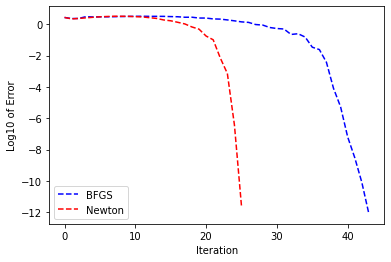

In [102]:
bx, bx_seq, bits = BFGS(x0, rosenbrock, grad_rosenbrock_3D, hess_rosenbrock_3D, tol=1e-12)

berr = np.sum(np.abs(bx_seq-bx),axis=1);

plt.plot(np.arange(bits), np.log10(berr[0:bits]), 'b--', np.log10(err[0:its]), 'r--')
plt.legend(['BFGS', 'Newton'])
plt.xlabel('Iteration')
plt.ylabel('Log10 of Error')

In [103]:
def DFP(x0, f, grad, hess, tol=1e-6, Nmax=100):
    x = x0.copy()
    
    x_seq = np.zeros((Nmax+1, len(x0)))
    x_seq[0] = x
    n = 0
    
    H = np.eye(3)
    
    while n < Nmax:
    
        g = grad(x)
        print (g)
        if np.linalg.norm(g) < tol:
            return x, x_seq, n
        
        p = -np.linalg.solve(H, g)
                
        t = wolfe_conditions(x, f, grad, p)
        
        x1 = x + t * p
        
        x_seq[n+1] = x1
    
        s = x1 - x
        y = grad(x1) - g
        rho = 1 / np.dot(y, s)
        I = np.eye(len(x))
    
        # Compute update for Hessian:
        d1 = np.outer(y, np.matmul(H, s))
        d2 = np.dot(y,s)
        
        n1 = np.matmul(H, np.matmul(np.outer(y,y), H))
        n2 = np.outer(s,s)
    
        H = H + n1/d1 + n2/d2
        
        x = x1
    
        n +=1
        
    print("Max Iterations Reached")
    return x, x_seq, n


[-1.2  1.   0.5]


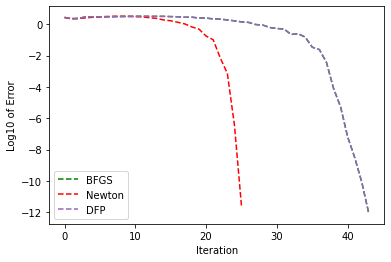

In [104]:
dx, dx_seq, dits = BFGS(x0, rosenbrock, grad_rosenbrock_3D, hess_rosenbrock_3D, tol=1e-12)

derr = np.sum(np.abs(dx_seq-dx),axis=1);

plt.plot(np.arange(bits), np.log10(berr[0:bits]), 'g--', np.log10(err[0:its]), 'r--', np.log10(derr[0:dits]), 'C4--')
plt.legend(['BFGS', 'Newton', 'DFP'])
plt.xlabel('Iteration')
plt.ylabel('Log10 of Error')
plt.show;


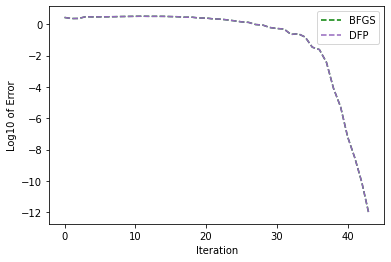

In [105]:

plt.plot(np.arange(bits), np.log10(berr[0:bits]), 'g--', np.log10(derr[0:dits]), 'C4--')
plt.legend(['BFGS', 'DFP'])
plt.xlabel('Iteration')
plt.ylabel('Log10 of Error')
plt.show;

In [106]:
import math
from numpy import *
import sys
import sympy as sy
# Line search

def lineSearchMethod(f, x, alpha, p):
    result = np.dot (f(x+alpha*p),p) == 0
    return result

import numpy as np

def is_pos_def(A):
    try:
        np.linalg.cholesky(A)
        return True
    except np.linalg.LinAlgError:
        return False

def SR1_update(B, s, y):
    # Compute the denominator of the update
    denominator = np.dot(y - np.dot(B, s), s)
    # Check if the denominator is close to zero, return the original B
    if abs(denominator) < 1e-8:
        return B
    # Compute the numerator of the update
    numerator = np.outer(y - np.dot(B, s), y - np.dot(B, s))
    # Compute the SR1 update for B
    B_new = B + numerator / denominator
    # Check if the updated matrix is still positive definite, return the original B
    if not is_pos_def(B_new):
        return B
    return B_new

def SR1(f, g, H, x0, maxiter=100000, tol=1e-6):
    x_seq = np.zeros((maxiter+1, len(x0)))
    n=np.shape(x0)[0]
    rho=0.55
    iter=0
    Bk=np.eye(3)
    while iter< maxiter:
        
        gk = g(x0)
        
        if np.linalg.norm(gk) < tol:
            break
        dk=-1*np.linalg.solve(Bk, gk)
        m=0
        mk=0
        
        p = -np.dot(Bk, gk)
                
        t = wolfe_conditions(x0, f, g, p)
        
        x = x0 + t * p
        
        x_seq[iter+1] = x
        sk = x - x0
        yk = g(x) - gk
        if np.dot(sk,yk) > 0:
            Bk = SR1_update(Bk, sk, yk)
        iter+=1
        
        x0 = x
        
    return x0, x_seq, iter



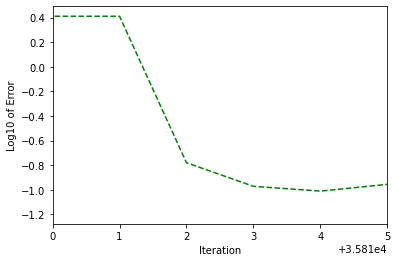

In [107]:
fx, x_seq, fits = SR1(rosenbrock, grad_rosenbrock_3D, hess_rosenbrock_3D, x0)

x_err = np.sum(np.abs(x_seq - np.array([1,1,1])), axis=1)

plt.plot(np.arange(fits), np.log10(x_err[1:]), 'g--')
plt.xlabel('Iteration')
plt.ylabel('Log10 of Error')
plt.xlim(35810, 35815)
plt.show()


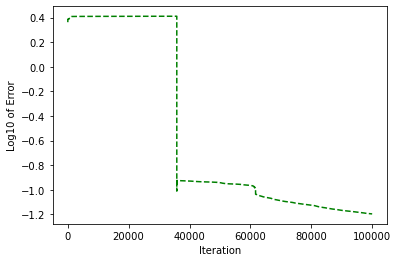

In [108]:
fx, x_seq, fits = SR1(rosenbrock, grad_rosenbrock_3D, hess_rosenbrock_3D, x0)

x_err = np.sum(np.abs(x_seq - np.array([1,1,1])), axis=1)

plt.plot(np.arange(fits), np.log10(x_err[1:]), 'g--')
plt.xlabel('Iteration')
plt.ylabel('Log10 of Error')
plt.show()

In [113]:
from scipy.optimize import minimize as opt
def min_Prob(s0, Bk, grad):
    return np.dot(grad.T, s0)-0.5*np.dot(np.dot(np.dot(s0.T,Bk),s0))
def SR1_TR(f, g, H, x0, maxiter=100000, tol=1e-12):
    k=0
    Bk = np.eye(3)
    trust_radi = 0.32
    eta = 0.5*10**-3
    r=.4
    x_seq = np.zeros((maxiter+1, len(x0)))
    while k < maxiter:
        
        gk = g(x0)
        
        if np.linalg.norm(gk) < tol:
            break
        
        if np.dot(np.dot(gk,Bk), gk) <=0:
            sk = -((trust_radi/np.linalg.norm(gk))*gk)
        elif ((np.linalg.norm(gk)**3)/(trust_radi*np.dot(np.dot(gk,Bk), gk))) < 1 :
              sk = -((trust_radi/np.linalg.norm(gk))*gk)*(np.linalg.norm(gk)**3)/(trust_radi*np.dot(np.dot(gk,Bk), gk))
        else:
            sk = -((trust_radi/np.linalg.norm(gk))*gk)
        yk=g(x0+sk)-gk
        ared = f(x0)-f(x0+sk)
        pred = -(np.dot(g(x0).T, sk)+0.5*np.dot(np.dot(sk,Bk),sk))
        
        if abs(ared/pred) > eta:
            
            x=x0+sk
        else:
            
            x = x0
        if abs(ared/pred) > 0.75:
            if np.linalg.norm(sk) > 0.8 * trust_radi:
                trust_radi = 2*trust_radi
        elif 0.1 <= abs(ared/pred) and abs(ared/pred) <=0.75:
            trust_radi = trust_radi
        else:
            trust_radi = 0.5*trust_radi
        
        if abs(np.dot(sk,(yk-np.dot(Bk,sk)))) >= r*np.linalg.norm(sk)*np.linalg.norm(yk-np.dot(Bk,sk)):
            Bk = SR1_update(Bk, sk, yk)
            
        k += 1
        x0 = x
        x_seq[k] = x
        
    return x0, x_seq, k



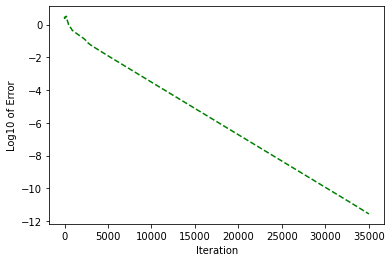

In [114]:
fx, x_seq, fits = SR1_TR(rosenbrock, grad_rosenbrock_3D, hess_rosenbrock_3D, x0)
x_err = np.sum(np.abs(x_seq - np.array([1,1,1])), axis = 1)

plt.plot(np.arange(fits), np.log10(x_err[0:fits]), 'g--')
plt.xlabel('Iteration')
plt.ylabel('Log10 of Error')
plt.show()